# Quantum noise in photosynthetic light harvesting


### & a short introduction to open quantum systems



Neill Lambert, RIKEN, nwlambert@gmail.com

#### Partially based on:

- EPFL summer school lecture Jupyter Notebook version: http://goo.gl/LpUaR1  

- Ahsan Nazir's Lecture Notes on Open quantum systems 

- "The theory of open quantum systems" by H.-P. Breuer and F. Petruccione.

- Robert Johansson's series of Lectures on QuTiP 
https://github.com/jrjohansson/qutip-lectures

- Uses QuTiP
http://qutip.org/




# Outline:

## Part 1

- Motivation: Examples of electronic coherence in photosynthetic light harvesting



## Part 2



- Modelling noise: The Lindblad Master equation; a quick derivation, and how to evaluate using QuTiP

- Introduction to QuTip

- FMO example
    


    
## Part 3


- Beyond the Master Equation: Exact numerical methods for bosonic baths

    - The Hierarchy Equations of Motion

- Comparing different methods
- Evaluating efficiency
- Conclusions 

## Part 1: Motivation

Every quantum system inevitably interacts with its environment.  

In general, it is impossible for us to model the whole dynamics of the system and environment.

So the goal of the theory of open quantum systems is to construct minimal solvable models and methods which account for the influence of the environment on the system.

<center>

<img src="sys-env.png" height="400" width="400"/>
</center>


# The motivation for the study of open quantum systems arises from:

1. **Describing real experiments** involving quantum degrees of freedom in contact with an environment, and real measurements, e.g.,

2. Understanding how the classical world arises from the quantum one.

3. Often we want to preserve quantum effects (quantum computation). Noise models are important for error correction, etc.




## Quantum optics

Many of the tools we use in open-quantum systems were developed to descibe interactions between atoms and light in cavities, as typified by the experiments of Serge Haroche (Nobel Prize in Physics 2012)

A | B
- | - 
![alt](QED.png) | ![alt](brume.png)

Brune et al, 1996.

## Quantum computing & quantum technologies

Artificial atoms are now used as the basis of quantum technologies, but are also subject to various noise sources.

A | B
- | - 
![alt](nakamura.jpg) | ![alt](ibm.jpg)


First observation of coherent oscillations: Nakamura, Pashkin, Tsai (NEC) 1999
Basis of modern quantum computing schemes (Photo from IBM)



## Photosynthetic light-harvesting
10 years ago similar apparent "coherent oscillations" were obseved in experiments on the Fenna-Matthews-Olsen complex from green sulphur bacteria (Nature Physics, Engel et al. 2007)

A | B
- | - 
<img src="fmo.png" width="600" height="600" />| <img src="fmoexperiment.png" width="600" height="600" />




Panitchayangkoon et al. PNAS (2010).

Does this mean quantum coherence is important for light-harvesting?  

In this lecture I will try to:
    
    1) Explain, with a simple example, how we can (minimally) model the features of ''electronic coherence''.
    
    2) How noise from the environment can be taken into account with various degrees of accuracy.
    
    3) Argue that a "quantum noise" model is neccessary in this case, and how coherence and noise optimize effiency of light-harvesting.
    
    4) Simultaneously, show everyone how to use QuTiP (Quantum Toolbox in Python)

## A basic model of photosynthetic light-harvesting
How do we make a (very) minimal model of a single excitation being transported through the complex?  Lets focus on just two sites  (chromophores)

<center>
<img src="simple2.png"/>    

</center>

We write the states as either both chromophores unexcited, or an electronic excitation on either chromophore.

We ignore double excitation.

If we focus on a single excitation subspace (let us ignore the ground-state), we can  just describe the two molecules as an effective spin:

<center>
<img src="simple3.png"/>    
</center>
We can write the energy  of these two levels in the form of a Hamiltonian, using the Pauli spin matrix:
<br>
<br>
<center> $H_E = \frac{\epsilon}{2}\sigma_z$, $\quad$ $\sigma_{z} = \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix}$ </center>
<br>
<br>

<center> $\sigma_z = |X_1, 0_2 \rangle \langle X_1,0_2| -|0_1,X_2\rangle \langle 0_1,X_2|$ </center>



## What about coupling between molecules?

There is typically a dipole coupling between nearby chromophores.  This is a dipole energy coupling:
<center>    
<img src="simple4.png"/>    
</center>

In the single-excitation subspace, we can again ignore the ground state, and write
<center>
<img src="simple5.png">
</center>

<br>
<br>
<center> $H_{D} = \frac{\Delta}{2}\sigma_x$</center>
<br>

<center> $\sigma_x = |X_1, 0_2 \rangle \langle 0_1,X_2| + |0_1,X_2\rangle \langle X_1,0_2|$, $\quad$ $\sigma_{x} = \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix}$<center>

<br>
<br>
Combining the two:
<br><br>
<center>$$H= H_S + H_D = \frac{\epsilon}{2} \sigma_z + \frac{\Delta}{2}\sigma_x $$</center>

Lets imagine we put an excitation on the first chromophore, and allow it to evolve under this simple Hamiltonian, what happens?

The initial condition is $$|\psi(t=0)\rangle = |X_1,0_2 \rangle$$

The dynamics are given by the standard time-independant Schrodinger equation

$$\frac{d}{dt}|\psi(t)\rangle = \frac{-i}{\hbar} H|\psi(t)\rangle$$

Typical parameters for $\epsilon = -120$ cm$^{-1}$, and $\Delta = 87$ cm$^{-1}$.

Note, to convert 1 cm$^{-1}$ = $100 \times h \times c$ Joules, c = speed of light, h = Planck's constant.

In units of $s^{-1}$, 100 cm$^{-1}$ corresponds to $10^4 \times h \times c/2\pi \hbar = 3\times 10^{12} s^{-1} = 3 THz$, i.e., a frequency with a time-scale of ~$333$ femto-seconds.



Let us solve this example using QuTiP, and plot 
<br>
<center> $$P_1(t) = |\langle X_1,0_2 | \psi(t)\rangle|^2$$ </center>

In [1]:
%pylab inline
from qutip import *

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.
Populating the interactive namespace from numpy and matplotlib


In [2]:


psi0 = basis(2,0)
tlist = linspace(0,0.333e-12,1000)
H = (-120 * sigmaz() + 87 * sigmax()) * 3e10 * 2 * pi
output = mesolve(H,psi0,tlist,[])
energies, states = H.eigenstates()

Pana = [abs((psi0*psi0.dag()).matrix_element(psi0,states[0])**2*exp(-1.0j*energies[0]*t)+
         (psi0*psi0.dag()).matrix_element(psi0,states[1])**2*exp(-1.0j*energies[1]*t))**2 for t in tlist]




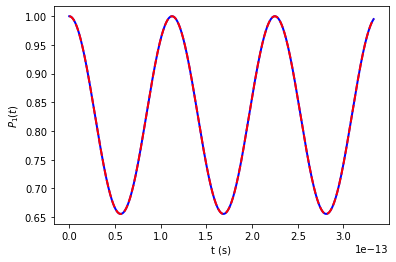

In [3]:

fig, ax = plt.subplots(1, 1)
ax.plot(tlist,expect(psi0*psi0.dag(),output.states), 'b', lw=2)
ax.plot(tlist,Pana, 'r--', lw=2)
ax.set_xlabel('t (s)')
ax.set_ylabel('$P_1(t)$')

plt.show()



<center>
<img src="fmoexperiment.png" height="600" width="600"/>
</center>

**Some questions**

1) How can we include noise in a 'quantum model'?

2) Are these "coherent oscillations" really electronic coherence, and do they play any role in maximizing efficiency of energy transport?


## Part 2



- Modelling noise: The Lindblad Master equation; a quick derivation

- Introduction to QuTip

- FMO example
    


# Part 2: The Lindblad Master equation; a quick derivation

One approach we can take to include noise is to treat the environment as a quantum system, but include its affect on the system perturbatively.  This is traditionally done with the Lindblad Master equation.  Let's sketch out its derivation first...

Steps:

1) A few definitions: density matrix, system and environment (bath) Hamiltonians.

2) Born - Markov approximations.

3) More definitions: The bath correlation function.

4) An explicit example:  the spin-boson model.

5) The secular approximation.

6) And finally, the Lindblad Master Equation.

## Definitions: The density operator

When a quantum system is effectively "closed" we describe its dynamics and evolution in terms of a pure state $|\psi(t)\rangle$ whose evolution is determined by a Hamiltonian and the Schrodinger equation (lets make life easier by neglecting $\hbar$)

$$\frac{\partial}{\partial t} |\psi(t)\rangle = -i H(t) |\psi(t)\rangle$$

More generally, for open systems it is convenient to use the density operator, which for a pure state, is given by

$$\rho = |\psi(t)\rangle \langle \psi(t)|$$




When describing one part of a larger composite system, as is the case for open systems 
<span style="color:red">when we trace out the environment degress of freedom</span>,  the loss of knowledge about the influence of the other systems introduces 
<span style="color:red">statistical uncertainty</span>. 

This then gives rise to mixed states, in terms of a statistical ensemble of possible pure states, such that;

$$\rho = \sum_n p_n |\psi_n(t)\rangle \langle \psi_n(t)|$$


The evolution of the density operator obeys the Liouville-von Neumann equation of motion,


$$\frac{\partial}{\partial t} \rho(t) = -i [H(t), \rho(t)]$$







The density operator itself has some important properties;

-- For pure states $\rho^2=\rho$

-- It is Hermitian $\rho^{\dagger} = \rho$.

-- It has trace one $\mathrm{Tr}\rho = 1$.

-- Expectation values of system operators can be evaluated as $\langle A \rangle =\mathrm{Tr}(A\rho)$.






## The system and environment Hamiltonians

Ultimately the influence of a large environment on a systems evolution is to induce statistical uncertainty into its dynamical evolution.  

This gives rise to dissipation (emission and absorbtion of energy) and dephasing (localization into particular states).

The philosophy we will describe here is to start with an 
<span style="color:red"> explicit Hamiltonian description of the system (**S**) and the full Environment (**E**) </span>, with the Hilbert space

$$\mathcal{H} = \mathcal{H}_S \otimes \mathcal{H}_E$$



and then 
<span style="color:red"> derive effective models, or equations of motion,</span> for the redused density operator of the system alone, after tracing out the environment degrees of freedom, i.e.,

$$\rho_S(t) = \mathrm{Tr}_E[\rho(t)]$$ 

since $\rho_S(t)$ descrives all pertinent and accessible information about the system itself.



The full dynamics of the system and environment would in principle be described by the Hamiltonian

$$H = H_S + H_E + H_I$$



In general, one can describe the evolution of the whole system and environment, 
<span style="color:red"> in the interaction picture </span>, as 

$$\frac{\partial}{\partial t} \tilde{ \rho}(t) = -i [\tilde{H}_I(t), \tilde{\rho}(t)]$$

where the interaction pictures moves the free evolution of both the system and environment into the operators themselves,
such that

$$\tilde{H}_I(t) = e^{i(H_S + H_E)t} H_I e^{-i(H_S + H_E)t}$$



Formally we can solve the equation of motion with

$$\tilde{\rho}(t) = \rho(0) - i \int_0^t ds [\tilde{H}_I(s),\tilde{\rho}(s)]$$

Substituting this into the RHS of the original equation of motion, and formally 
<span style="color:red"> tracing out the environment degrees of freedom </span>, gives,

$$\frac{\partial}{\partial t} \tilde{ \rho}_S(t) = -i \mathrm{Tr}_E[\tilde{H}_I(t), \tilde{\rho}(0)]  -  \int_0^t ds \mathrm{Tr}_E [\tilde{H}_I(t),[\tilde{H}_I(s),\tilde{\rho}(s)]$$

## The Born Approximation

This is still an intractable equation of motion.  To make progress we must make a series of 
<span style="color:red">assumptions</span>:




-- 
<span style="color:red"> **Factorizable initial conditions** </span>: We assume that at $t=0$ the system and environment are seperable, such that 

$$\rho(0) = \rho_S(0) \otimes \rho_E(0)$$


-- <span style="color:red"> **The Born approximation**</span>: In addition, we assume that the density matrix <span style="color:red">factorises</span> at all times, and that the <span style="color:red"> environment state is time-independent</span>,

$$\rho(t) = \rho_S(t) \rho_E(0)$$

This assumes that the environment is mostly unaffacted by the interaction with the system. (Any excitations emitted by the system quickly decay in the environment)

-- Note: We also remove the first term on the RHS (for many examples it is zero, or it can be cancelled with a c-number term in the system Hamiltonian).



Under these assumptions,

$$\frac{\partial}{\partial t} \tilde{ \rho}_S(t) =  - \int_0^t ds \mathrm{Tr}_E [\tilde{H}_I(t),[\tilde{H}_I(s),\tilde{\rho_S}(s)\rho_E]$$

This equation of motion assumes weak coupling, as the system and environment remain seperable; 

... but it still includes some <span style="color:red"> time non-local behavior</span> as the state of the system depends on its history (via the integral over $s$), and thus its past interaction with the bath.





# The Markov Approximation

We can now make what is known as the <span style="color:red"> **Markov** </span> assumption, to eliminate this history. 



We assume 

$$\tilde{\rho}_S(s) \rightarrow \tilde{\rho}_S(t)$$

in the integral.  

This assumptions implies there is a seperation of time scales between environment (**$\tau_E$**) and system relaxation time (**$\tau_R$**) and any intrinsic system time scales (**$\tau_S$**), 

$$\tau_E \ll \tau_R, \tau_S$$



I.e., if the environment were to be perturbed by the system, it relaxes back to equilibrium faster than the typical time scale of the evolution (**relaxation** and coherent evolution) of the system. This seems like a consistent assumption to make alongside the **Born approximation**, since that also implies the environment remains in equilibrium.


Now we have, after substituting $\tilde{\rho}_S(s) \rightarrow \tilde{\rho}_S(t)$

$$\frac{\partial}{\partial t} \tilde{ \rho}_S(t) =  - \int_0^t ds \mathrm{Tr}_E [\tilde{H}_I(t),[\tilde{H}_I(s),\tilde{\rho}_S(t)\rho_E]$$



This is sometimes called the Redfield equation; it local in time, but <span style="color:red">not quite completely Markovian</span> (we still have $t$ in the integral limits).



We can simplifiy this further by removing the reference to $t$ in the limits of the integral, by choosing $s=t-\tau$, and letting the upper limit go to infinity;  

In other words, we assume that the integrand  dissappears fast compared to the system time scales.




Thus we arrive at the <span style="color:red">fully Markovian master equation</span>;

$$\frac{\partial}{\partial t} \tilde{ \rho}_S(t) =  -  \int_0^{\infty} d\tau \mathrm{Tr}_E [\tilde{H}_I(t),[\tilde{H}_I(t-\tau),\tilde{\rho}_S(t)\rho_E]$$


# Describing the bath with a correlation function

The system depends on the environment properties via the two-time bath correlation functions. For example, lets explicitly define the system-environment interaction term as,

$$H_I = A \otimes B$$

where $A$ is a Hermitian system operator, and $B$ a Hermitian bath operator.  (An explicit example will soon make this a little clearer).




In the interaction picture 

$$\tilde{H} = A(t) \otimes B(t)$$

Our Markovian master equation contains terms like:  $\mathrm{Tr_E}[B(t)B(t-\tau)\rho_E]$

If we assume the initial state of the environment is a steady state, i.e., it does not evolve under $H_E$, these terms are <span style="color:red">"stationary"</span>,  $C(\tau) = \mathrm{Tr_E}[B(\tau)B\rho_E]$


Inserting these various terms into our Markovian master equation, and moving back to the Schrodinger picture, one obtains

$$ \frac{\partial}{\partial t} \rho_S(t) = -i[H_S,\rho(t)] - \int_0^{\infty} d\tau \left( [A,[A(-\tau)\rho_S(t)]C(\tau) + [\rho_S(t)A(-\tau),A]C(-\tau)\right)$$

This equation in itself is useful, and can be developed and applied to certain problems. 

However, it is still not in the famous <span style="color:red">**Lindblad**</span> form, and does not guarantee positivity of the density matrix as it is evolved.


Note: In general there may be a sum of interactions in the interaction Hamiltonian, in which case the integral contains a sum of terms for each interaction part, and the correlation functions are generalized $\tilde{H} = \sum_{\alpha}A_{\alpha}(t) \otimes B_{\alpha}(t)$

$$ \frac{\partial}{\partial t} \rho_S(t) = -i[H_S,\rho(t)] - \sum_{\alpha,\beta}\int_0^{\infty} d\tau \left( [A_{\alpha},[A_{\beta}(-\tau)\rho_S(t)]C_{\alpha\beta}(\tau) + [\rho_S(t)A_{\beta}(-\tau),A_{\alpha}]C_{\beta\alpha}(-\tau)\right)$$

 



Interestingly, there is still not yet any assumption about the timescales $\tau_S$, due to $H_S$, and the relaxation $\tau_R$, induced by the bath. 

If we perform an additional approximation, and <span style="color:red">neglect terms due to system evolution which are very fast compared to the relaxation time scale $\tau_R$</span>, we can obtain a **Secular master equation** which is in **Lindblad form**. 

In other words, we will assume, $\tau_S\ll \tau_R$, so that now, the Born-Markov-Secular master equation will be valid when

$$\tau_E \ll \tau_S \ll \tau_R$$




It is a little cumbersome to the general derivation of this step, so let us move onto an explicit example. However, one note;  the above **non-secular** form of the master equation is **may be** applicable even if the relaxation time scale and the system time scale are comparable, and thus it is useful in and of itself. (See Chapter 3.6 in Breuer and Pettrucione).
 


## The spin-boson model

The archetypical example of an open quantum system is where the "system" is a two-level system, a spin, described by:

<span style="color:red">Pauli spin matrices</span>

\begin{align}
\sigma_{x} = \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix},\quad
\sigma_{y} = \begin{pmatrix} 0 & -i \\ i & 0 \end{pmatrix}, \quad
\sigma_{z} = \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix},
\end{align}




While the bath is a continuum of <span style="color:red"> boson modes </span>, or harmonic oscillators, described by creation and annihilation operators $b_k$, obeying the commutation relations $[b_k,b_k']=\delta_{k,k'}$


Returning to our example from earlier, our 'spin' was the position of the electronic excitation, and the bosons are the nuclear motion of the chromophores that modulate the energy of the electronic excitations

A | B
- | - 
 <img src="fmo.png" alt="Drawing" style="width: 450px;"/> | <img src="simple2.png" alt="Drawing" style="width: 450px;"/>


The total Hamiltonian is then,

$$H= H_S + H_E + H_I$$

where





$$ H_S = \frac{\epsilon}{2} \sigma_z + \frac{\Delta}{2}\sigma_x$$




$$ H_E = \sum_k \omega_k b_k^{\dagger}b_k$$




$$ H_I = \sigma_z \sum_k g_k (b_k^{\dagger}+b_k)= \sum_{j,l}c_{j,l} |\psi_j\rangle \langle \psi_l|\sum_k g_k (b_k^{\dagger}+b_k)$$

For eigenstates $|\psi_j\rangle$ of $H_S$, and $c_{j,l} = \langle \psi_j | \sigma_z  |\psi_l\rangle$

In the <span style="color:red">interaction picture</span> the interaction Hamiltonian is 

$$\tilde{H}_I(t) = e^{i(H_S + H_E)t} H_I e^{-i(H_S + H_E)t}$$

   

$$ \tilde{H}_I =  \sum_{j,l}c_{j,l} |\psi_j\rangle \langle \psi_l|e^{i\Delta_{j,l}t}\sum_k g_k (b_k^{\dagger}e^{i\omega_k t}+b_ke^{-i\omega_k t})$$

$$\Delta_{j,l} = E_j - E_l$$ is the difference in eigenenergies.


Inserting this into our master equation, we find, 


$$ \frac{\partial}{\partial t} \rho_S(t) =  - \int_0^{\infty} d\tau \left( [\sigma_z(t),[\sigma_z(t-\tau)\rho_S(t)]C(\tau) + [\rho_S(t)\sigma_z(t-\tau),\sigma_z(t)]C(-\tau)\right)$$




Recall that the bath correlation functions are defined as

$$C(\tau) = \mathrm{Tr_E}[B(\tau)B\rho_E]$$

Where

$$B(t) = \sum_k g_k\{ b_k^{\dagger}e^{i\omega_k t}+ b_ke^{-i\omega_k t}\}$$

$$C(t)=\mathrm{Tr_E}[ (\sum_k g_k  \{b_k^{\dagger}e^{i\omega_k t}+ b_ke^{-i\omega_k t}\}) (\sum_{k'} g_{k'}\{ b_{k'}^{\dagger}+ b_{k'}\}) \rho_E]$$



Assuming that the initial state of the environment is a thermal state

$$\rho_E = e^{-H_E / k_B T} / Z$$  

$$Z=\mathrm{Tr}(e^{-H_E / k_B T})$$

lets us evaluate this quite easily;





The only non-zero terms come from 

$$\mathrm{Tr_E}[b_k b_{k'}^{\dagger}\rho_E]=\delta_{kk'}[1+n(\omega_k)]$$

and

$$ \mathrm{Tr_E}[ b_{k'}^{\dagger} b_k\rho_E]=\delta_{kk'}n(\omega_k)$$

where $n(\omega) =(e^{\omega/k_B T} - 1)^{-1}$.

Is the Bose-Einstein occupation number.


Then

$$C(t)= \sum_k \left(g_k^2 e^{i\omega_k t}n(\omega_k)+ g_k^2 e^{-i\omega_k t}[1+n(\omega_k)]\right)$$




We can then move to a continuum representation by turning the sum into an integral, and defining the **spectral density**

<span style="color:red">
$$J(\omega) = \sum_k g_k^2\delta(\omega-\omega_k)$$
</span>



$$C(t)= \int_0^{\infty}d\omega \{J(\omega) e^{i\omega t}n(\omega)+ J(\omega) e^{-i\omega t}[1+n(\omega)]\}$$

**Note: sometimes it is useful to rewrite this in terms of real and imaginary parts. See part 3!


# The secular approximaton

Let us return to the master equation, in the interaction picture;

$$ \frac{\partial}{\partial t} \rho_S(t) =  - \int_0^{\infty} d\tau \left( [\sigma_z(t),[\sigma_z(t-\tau)\rho_S(t)]C(\tau) + [\rho_S(t)\sigma_z(t-\tau),\sigma_z(t)]C(-\tau)\right)$$

We are going to do two things:

    
    
- Neglect terms come from products of system operators that rotate quickly... this is the <span style="color:red">secular approximation!</span>

Its equivalent in this case to a <span style="color:red">rotating wave approximation</span>;  and for it be valid, the relaxation rate has to be smaller than the system frequency.  

    
- Evaluate the integral over $\tau$ and $\omega$

This is a lot of algebra, so lets just do one term.



## First, the secular approximation:

Recall that, in the interaction picture:

$$\sigma_z(t) =\sum_{j,l}c_{j,l} |\psi_j\rangle \langle \psi_l|e^{i\Delta_{j,l}t}$$



So the first term in the master equation contains products like

$$ \sigma_z(t)\sigma_z(t-\tau)= \sum_{j,l}c_{j,l} |\psi_j\rangle \langle \psi_l|e^{i\Delta_{j,l}t} \sum_{n,m}c_{n,m} |\psi_n\rangle \langle \psi_m|e^{i\Delta_{n,m}(t-\tau)}$$



We neglect terms oscillating very quickly, like <span style="color:red">$2i\Delta_{j,l}$. </span> (Note we also ignore diagonal terms ($j=l$ etc) just for simplicity, though these can induce additional dephasing contributions).


This is similar to a rotating wave approximation, and is valid if $\tau_S \ll \tau_R$  i.e., when the relaxation rate is smaller than the system frequencies.  Now we have the seperation of time scales

$$\tau_E \ll \tau_S \ll \tau_R$$



# Second, some integrals

For the remaining terms, that do not rotate at this frequency, we have to evaluate integrals like,

$$ |\psi_l\rangle\langle\psi_l| \rho_S(t)  \int_0^{\infty} d\tau e^{i\Delta_{j,l} \tau}C(\tau)$$



Using our earlier definition of the correlation function

$$C(t)= \int_0^{\infty}d\omega \{J(\omega) e^{i\omega t}n(\omega)+ J(\omega) e^{-i\omega t}[1+n(\omega)]\}$$

We have to evaluate

$$\int_0^{\infty} d\tau e^{i \Delta_{j,l} \tau}C(\tau) =  \int_0^{\infty}d\omega \int_0^{\infty} d\tau e^{i\Delta_{j,l} \tau} \{J(\omega) e^{i\omega \tau}n(\omega)+ J(\omega) e^{-i\omega \tau}[1+n(\omega)]\}$$



We can do the $\tau$ integral first, using the formula,

$$\int_0^{\infty} d\tau e^{\pm i\epsilon \tau} = \pi \delta(\epsilon) \pm i \frac{\mathcal{P}}{\epsilon}$$

$\mathcal{P}$ is the Cauchy principal value. The imaginary term leads to environment-induced energy shifts (sometimes called Lamb shifts.  Here we neglect this term, for simplicity.



We see that the delta function lets us then evaluate the frequency integral, and thus,

$$\int_0^{\infty} d\tau e^{i\Delta_{j,l} \tau}C(\tau)= \pi J(\Delta_{j,l}) (n(\Delta_{j,l})+1)$$


Thus for this term, the right hand side of the master equation becomes 

$$  |\psi_l\rangle\langle\psi_l|  \rho_S(t)  \left[\int_0^{\infty} d\tau e^{i\Delta_{j,l} \tau}c(\tau)\right] =  \pi J(\Delta_{j,l}) (n(\Delta_{j,l})+1) |\psi_l\rangle\langle\psi_l|  \rho_S(t) $$



# The **Lindblad master equation**


We are almost there! If we repeat this for each term in the master equation, and collect terms, and move back to the schrodinger picture, we find an equation of motion describing the density matrix of the system alone, which is known as the Lindblad master equation (Gorini–Kossakowski–Sudarshan–Lindblad)



<span style="color:blue">
$$\frac{\partial}{\partial t} \rho_S(t) = -i[H_S,\rho(t)] $$</span>
<span style="color:green">$$+ \sum_{j>l,l}\pi J(\Delta_{j,l})|c_{j,l}|^2 \left(n(\Delta_{j,l})+1\right)\left[2 |\psi_l\rangle\langle\psi_j| \rho_S(t) |\psi_j\rangle\langle\psi_l|  -  \{|\psi_j\rangle\langle\psi_j| ,\rho_S\}\right] $$</span>
<span style="color:red">$$+ \sum_{j>l,l}\pi J(\Delta_{j,l})|c_{j,l}|^2 n(\Delta_{j,l})\left[2 |\psi_j\rangle\langle\psi_l| \rho_S(t) |\psi_l\rangle\langle\psi_j|  -  \{|\psi_l\rangle\langle\psi_l| ,\rho_S\}\right] $$
</span>





The first part is the 
<span style="color:blue">coherent system evolution</span>, the second part describes <span style="color:green">spontaneous and stimulated emission</span>, and the third part describes <span style="color:red">absorption</span>.



# Why is this so great?

- This Lindblad form guarantees positivity:  we will always have a physical density matrix.

- It is easy to evaluate, and can be derived for many types of systems.  

(see part 2 for more examples).






# To recap, it is valid when:

- The <span style="color:red">**Born approximation**</span> applies:  the coupling is weak such that we can assume $\rho(t) = \rho_S(t)\otimes\rho_E$

- The <span style="color:red">**Markov approximation**</span> applies:  the bath returns to equilibrium on a time scale $\tau_E$ which is faster than the relaxation of the system induced by that bath $\tau_R$. 

- The <span style="color:red">**secular approximation**</span> applies:  the system time scales are small (i.e., higher frequency) than the relaxation time scales.  In other words, $\epsilon > \pi J(\epsilon) (n(\epsilon)+1)$.

$$\tau_E \ll \tau_S \ll \tau_R$$

** Two questions **:

- Can we use this model to describe the environment affecting energy transport in FMO?

- Does noise slow down transport, or speed it up?



# Solution to the Lindblad master equation

In some cases we can get analytical solutions.

This is easily done by writing out equations of motion for the matrix elements of the master equation, and assuming the bath spectrum is flat, so that $\pi J(\Delta_{j,l})|c_{j,l}|^2 = \gamma$.  

<span style="color:blue">
$$\frac{\partial}{\partial t} \rho_S(t) = -i[H_S,\rho(t)] $$</span>
<span style="color:green">$$+ \sum_{j>l,l}\gamma \left(n+1\right)\left[2 |\psi_l\rangle\langle\psi_j| \rho_S(t) |\psi_j\rangle\langle\psi_l|  -  \{|\psi_j\rangle\langle\psi_j| ,\rho_S\}\right] $$</span>
<span style="color:red">$$+ \sum_{j>l,l}\gamma n \left[2 |\psi_j\rangle\langle\psi_l| \rho_S(t) |\psi_l\rangle\langle\psi_j|  -  \{|\psi_l\rangle\langle\psi_l| ,\rho_S\}\right] $$
</span>





which give, for $e=$ excited state, $g=$ ground state, 


$$\dot{\rho}_{ee}(t) = -2 \gamma (n+1) \rho_{ee}(t) + 2\gamma n \rho_{gg}(t)$$
$$\dot{\rho}_{gg}(t) = -2 \gamma (n) \rho_{gg}(t) + 2\gamma (n+1) \rho_{ee}(t)$$
$$\dot{\rho}_{eg}(t) = - [\gamma (2n+1) + i\Delta_{e,g}] \rho_{eg}(t)$$
$$\dot{\rho}_{ge}(t) = - [\gamma (2n+1) - i\Delta_{e,g}] \rho_{ge}(t)$$

We an see that the populations are coupled with rates corresponding to the emission and absorption.  The off-diagonal matrix elements decay proportional to the coupling the environment.   This is decoherence!



The solutions to these equations are very simple for zero temperature ($n=0$), where we see:

$$\rho_{ee}(t) = e^{-2 \gamma t} \rho_{ee}(0) $$
$$\rho_{gg}(t) = 1-2 e^{-2 \gamma t} \rho_{ee}(0)$$
$$\rho_{eg}(t) = e^{- \gamma t}e^{ - i\Delta_{e,g} t} \rho_{eg}(0)$$
$$\rho_{ge}(t) = e^{- \gamma t}e^{  i\Delta_{e,g} t} \rho_{ge}(0)$$

The off diagonal terms decay at half the speed of the relaxation terms, leading to the infamous <span style="color:red">$T_2 = 2T_1$</span> relationship.

In the general case, it can be tedious to construct and solve such equations of motion.  

So... lets use QuTiP to play with some examples, and see what noise does to our previous example of pure evolution.


# QuTiP:  A brief introduction

The Quantum Toolbox in Python was developed in our group, primarily by Robert Johansson (now working Rakuten) and Paul Nation (now working in IBM-Q).  Continued development by Alex Pitchford, Erik Guigere, Me, and others.

http://qutip.org/devs.html

It has a variety of built-in solvers for solving the dynamics via: 
- the Schrodinger equation, 
- master equations, 
- Floquet formalism, 
- Monte-Carlo quantum trajectories, 
- stochastic Schrodinger/master equations, 
- the Hierarchy method, the reaction coordinate method, etc.
- supports time-dependance in Hamiltonians, Lindblads, etc.



It based around a quantum object class which can be used to represent state vectors, operators, and superoperators.

It is composed of a numerical matrix, and various properties that define its dimensionality, etc.
<center>
<img src="qobj.png" />
</center>

## Other reasons to use QuTiP

- Open source science
- Promotes reproducibility
- Has even more functionality, including 
    - Quantum optimal control library (CRAB, GOAT, and other animals)
    - QIP library
    - functions to calculate spectra, counting statistics, etc
    - Supports arbitrary time-dependance, in Hamiltonian and Lindblad collapse operators
    - Active development community.

In [1]:
%pylab inline
from qutip import *

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.
Populating the interactive namespace from numpy and matplotlib


Recalling our example of a single two-level system described by the Pauli spin matrices


\begin{align}
\sigma_{x} = \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix},\quad
\sigma_{y} = \begin{pmatrix} 0 & -i \\ i & 0 \end{pmatrix}, \quad
\sigma_{z} = \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix},
\end{align}

In QuTiP we can define this manually, or with predefined operators:


In [2]:
sz = Qobj([[1,0], [0,-1]]) # the sigma-z Pauli operator
sz

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 1.  0.]
 [ 0. -1.]]

In [3]:
sz = sigmaz() # the sigma-z Pauli operator
sz

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 1.  0.]
 [ 0. -1.]]

We can define and solve the Lindblad Master equation we solved analytically earlier in few lines:


<span style="color:blue">
$$\frac{\partial}{\partial t} \rho_S(t) = -i[H_S,\rho(t)] $$</span>
<span style="color:green">$$+ \sum_{j>l,l}\gamma \left(n+1\right)\left[2 |\psi_l\rangle\langle\psi_j| \rho_S(t) |\psi_j\rangle\langle\psi_l|  -  \{|\psi_j\rangle\langle\psi_j| ,\rho_S\}\right] $$</span>
<span style="color:red">$$+ \sum_{j>l,l}\gamma n \left[2 |\psi_j\rangle\langle\psi_l| \rho_S(t) |\psi_l\rangle\langle\psi_j|  -  \{|\psi_l\rangle\langle\psi_l| ,\rho_S\}\right] $$
</span>

QuTiP has several options on how to solve this type of formula.  

The default is "mesolve" which takes Qobj definitions of the Hamiltonian, and the Lindblad, and converts them into a set of coupled equations in matrix form, as we did earlier. It then directly solves this set of coupled ODEs.



First define the Hamiltonian $H_S = \frac{\epsilon}{2}\sigma_z +\frac{\Delta}{2} \sigma_x$ 

and initial condition $\psi(t=0) = |1\rangle$,  $\rho(0) = |1\rangle\langle 1|$


In [142]:


eps = -120
Delta = 87

# Hamiltonian
H = (eps * sigmaz() + Delta * sigmax()) * 3e10 * 2 * pi


# initial state.  
N = 2 # number of states in the Hilbert space
n = 0 # the state that will be occupied (python counts from zero)

psi0 = basis(N, n)     
print(psi0)

print(psi0*psi0.dag())

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[1.]
 [0.]]
Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[1. 0.]
 [0. 0.]]


In [143]:
H.eigenstates()

(array([-2.79387047e+13,  2.79387047e+13]),
 array([Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
 Qobj data =
 [[-0.9512125 ]
  [ 0.30853651]],
        Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
 Qobj data =
 [[0.30853651]
  [0.9512125 ]]], dtype=object))


We can define our Lindblad master equation by just defining the rates and the operator which goes into master equation.

Here we have two operators; one which causes emission, 

<span style="color:green">$$ \sum_{j>l,l}\gamma \left(n+1\right)\left[2 |\psi_l\rangle\langle\psi_j| \rho_S(t) |\psi_j\rangle\langle\psi_l|  -  \{|\psi_j\rangle\langle\psi_j| ,\rho_S\}\right] $$
    
the other absorption
    
<span style="color:red">$$\sum_{j>l,l}\gamma n \left[2 |\psi_j\rangle\langle\psi_l| \rho_S(t) |\psi_l\rangle\langle\psi_j|  -  \{|\psi_l\rangle\langle\psi_l| ,\rho_S\}\right] $$
</span>


In [144]:

gamma = 40 * 3e10 #this should be smaller than our system energies.
n_th = 0.0 #Start with zero temperure for simplicity

all_energy, all_state = H.eigenstates()
Nmax = 2
sz = sigmaz()
collapse_list = []
for j in range(Nmax):

    for k in range(j+1,Nmax):
        #FYI: QuTiPs definition of a Lindblad differs from our derivation by a factor of '2'
        rate = np.absolute(sz.matrix_element(all_state[j].dag(),all_state[k]))**2 * 2 * gamma * (n_th+1)
        if rate > 0.0:
            collapse_list.append((np.sqrt(rate)*all_state[j]*all_state[k].dag()))  #emission
        
        
        rate = np.absolute(sz.matrix_element(all_state[k].dag(),all_state[j]))**2 * 2 *gamma * (n_th)
        if rate > 0.0:
            collapse_list.append((np.sqrt(rate)*all_state[k]*all_state[j].dag())) #absorption
            

Next define the time steps we want to solve the equations for, and run the "mesolve" function

In [145]:
# list of times for which the solver should store the state vector
tlist = linspace(0,0.333e-12,1000)
output = mesolve(H, psi0, tlist, collapse_list)

Lets also run an example where we start in an eigenstate of the Hamiltonian

In [146]:

ee = all_state[1]
output2 = mesolve(H, ee, tlist, collapse_list)


Calculate some expectation values, and compare to analytical result

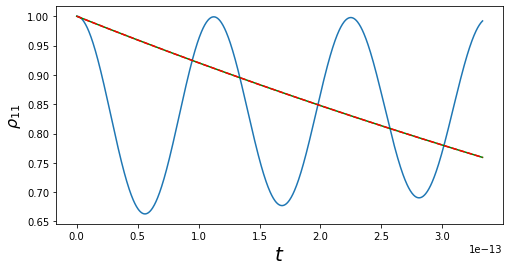

In [148]:
#Since our initial state was the excited state, we can get the probability of being in the excited state
#at time t with:
Pe = expect(output.states, psi0*psi0.dag())
Pe2 = expect(output2.states, ee*ee.dag())

#For the case where we start in eigenstate, we can compare this to our analytical result
PeAna = [np.exp(-2 * sz.matrix_element(all_state[0],all_state[1])**2 * gamma * t) for t in tlist]


fig, axes = plt.subplots(1,1, figsize=(8,4))
axes.plot(tlist, Pe)
axes.plot(tlist, Pe2, color = 'g')
axes.plot(tlist, PeAna, color='r',ls='--')
axes.set_xlabel(r'$t$', fontsize=20)
axes.set_ylabel(r"$\rho_{11}$", fontsize=16);

If we assume non-zero temperature, the steady state (the long-time solution) of the master equation predicts a thermal state.

Analytically, setting the LHS of our equations to zero, and solving, gives the disribution:

$$\rho_{ee} = \frac{n}{(1+2n)}$$
$$\rho_{gg} = \frac{1+n}{(1+2n)}$$

Which is equivalent to the thermal distribution:

$$ \rho = e^{H_S/k_B T}/Z $$


Lets check this two ways in QuTiP.  First with steadystate() function, then with the thermal_dm() function

In [155]:
#non zero temperature
n_th = 1.3


collapse_list = []
for j in range(Nmax):

    for k in range(j+1,Nmax):

        rate = np.absolute(sz.matrix_element(all_state[j].dag(),all_state[k]))**2 * 2 * gamma * (n_th+1)
        if rate > 0.0:
            collapse_list.append((np.sqrt(rate)*all_state[j]*all_state[k].dag()))  #emission
        
        
        rate = np.absolute(sz.matrix_element(all_state[k].dag(),all_state[j]))**2 * 2 *gamma * (n_th)
        if rate > 0.0:
            collapse_list.append((np.sqrt(rate)*all_state[k]*all_state[j].dag())) #absorption


In [156]:
            
#Set non-zero temperature and get new collapse_list first
n_th = 1.3

rhoss = steadystate(H,collapse_list)
print(expect(rhoss,all_state[1]*all_state[1].dag()))
print(expect(rhoss,all_state[0]*all_state[0].dag()))

0.36111111111111127
0.6388888888888888


In [157]:
#Compare to analytical prediction
print(n_th / (1+ 2 * n_th))
print((1+n_th) / (1+ 2 * n_th))

0.3611111111111111
0.6388888888888888


In [158]:
#Built in function to calculate thermal state with occupation n_th
print(thermal_dm(2, n_th))

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.63888889 0.        ]
 [0.         0.36111111]]


Returning back to our example, can be include more chromophores?  

In the single-excitation limit, we wrote 2-sites as a 2-level system.

For 7-sites we can write a 7-level system with Hamiltonian

$$ H = \sum_{j=1}^7 \epsilon_j |j\rangle\langle j| + \sum_{j,j'} J_{j,j'} \left(|j\rangle \langle j'| + c.c \right)$$

<center>
<img src="fmo.png" height="600" width="600"/>
 </center>

In [60]:

H =  Qobj([[200, -87.7, 5.5, -5.9, 6.7, -13.7, -9.9],
                    [-87.7, 320, 30.8, 8.2, 0.7, 11.8, 4.3],
                    [5.5, 30.8, 0, -53.5, -2.2, -9.6, 6.0],
                    [-5.9, 8.2, -53.5, 110, -70.7, -17.0, -63.3],
                    [6.7, 0.7, -2.2, -70.7, 270, 81.1, -1.3],
                    [-13.7,11.8, -9.6, -17.0 ,81.1, 420, 39.7],
                    [-9.9, 4.3, 6.0, -63.3, -1.3, 39.7, 230]])

print(H)

#Rescale H
H =  3e10 * 2 * pi * H


Quantum object: dims = [[7], [7]], shape = (7, 7), type = oper, isherm = True
Qobj data =
[[200.  -87.7   5.5  -5.9   6.7 -13.7  -9.9]
 [-87.7 320.   30.8   8.2   0.7  11.8   4.3]
 [  5.5  30.8   0.  -53.5  -2.2  -9.6   6. ]
 [ -5.9   8.2 -53.5 110.  -70.7 -17.  -63.3]
 [  6.7   0.7  -2.2 -70.7 270.   81.1  -1.3]
 [-13.7  11.8  -9.6 -17.   81.1 420.   39.7]
 [ -9.9   4.3   6.  -63.3  -1.3  39.7 230. ]]


In [61]:
# initial state.  
N = 7 # number of states in the Hilbert space
n = 0 # the state that will be occupied (python counts from zero)

psi0 = basis(N, n)     
print(psi0)

Quantum object: dims = [[7], [1]], shape = (7, 1), type = ket
Qobj data =
[[1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


The interaction with the bath becomes a little more complicated.  Now each chromophore is assumed to interact with an independent bath.  Each bath modules the energy of that chromophore via coupling to the operator:

$$H_I = \sum_{m=1}^7 |m\rangle \langle m| \sum_k g_{k,m} (b_{k,m} + b_{k,m}^{\dagger})$$

But, the derivation is done just as before, and we find we can easily adapt our ealier model.

Recall that in the Master equation emission and absorption depend on the environment temperature, and the environment spectral density:
<span style="color:red">
$$J(\omega) = \sum_k g_k^2\delta(\omega-\omega_k)$$
</span>

In many cases we just pretend this is not energy dependent.  However, for FMO, it is know that this function has some structure.  In Ishizaki and Fleming PNAS 2012 they argue that the environment has a decay time of between $50$ fs and $200$ fs. We can capture this with a Drude-Lorentz spectral density:

$$J(\omega) = \frac{2\lambda \gamma \omega}{\pi (\omega^2 + \gamma^2)}$$

$\lambda$ tells us how strong the overall interaction with the environment is

$\gamma$ tell us the bath cut-off, or decay rate, so is inverse of the bath memory time.

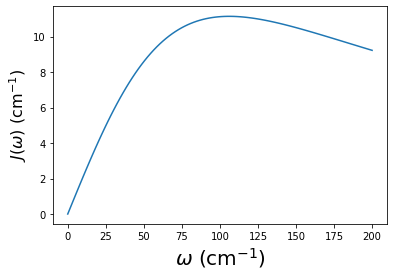

In [62]:

def J0(energy):
    #underdamped brownian oscillator
    lam = 35 * 3e10 * 2 * pi  #35 cm^-1
    gamma = (1/(50e-15))   #1/50 fs
    return 2 * lam * gamma * (energy)/( pi * ((energy**2) + (gamma**2)))
wlist = linspace(0, 200*3e10*2*pi,100)
    
fig, axes = plt.subplots(1,1, figsize=(6,4))

axes.plot(wlist/(3e10*2*pi), [J0(w)/(3e10*2*pi) for w in wlist])
axes.set_xlabel(r'$\omega$ (cm$^{-1}$)', fontsize=20)
axes.set_ylabel(r"$J(\omega)$ (cm$^{-1}$)", fontsize=16);   

In [78]:

#To be more accurate let us use 300 Kelvin as the temperature
Temperature = 300 * 0.6949 * 3e10 * 2 * pi
#Temperature = 77 * 0.6949 * 3e10 * 2 * pi

def n_th(energy):
   
    beta=1./Temperature
    
    return 1./(np.exp(energy*beta) - 1.)

def J0(energy):
    #underdamped brownian oscillator
    lam = 35 * 3e10 * 2 * pi
    gamma = (1/(50e-15))
    return 2 * lam * gamma * (energy)/( pi * ((energy**2) + (gamma**2)))

def J02(energy):
    #underdamped brownian oscillator
    lam = 35 * 3e10 * 2 * pi
    gamma = (1/(50e-15))
    return 2 * lam * gamma /(np.pi * ((gamma**2)))



all_energy, all_state = H.eigenstates()

Nmax = 7


Q_list = [basis(Nmax, n)*basis(Nmax, n).dag() for n in range(Nmax)]

dephasing = 0

collapse_list = []

for Q in Q_list:
    for j in range(Nmax):

        for k in range(j+1,Nmax):
            Deltajk = abs(all_energy[k] - all_energy[j])
            if abs(Deltajk) > 0 :
                rate = np.absolute(Q.matrix_element(all_state[j].dag(),all_state[k]))**2 * 2 * pi * J0(Deltajk) * (n_th(Deltajk)+1)
                if rate > 0.0:
                    collapse_list.append((np.sqrt(rate)*all_state[j]*all_state[k].dag()))  #emission


                rate = np.absolute(Q.matrix_element(all_state[k].dag(),all_state[j]))**2 * 2 * pi * J0(Deltajk) * (n_th(Deltajk))
                if rate > 0.0:
                    collapse_list.append((np.sqrt(rate)*all_state[k]*all_state[j].dag())) #absorption
    if dephasing == 1:
        for j in range(Nmax):

            rate = np.absolute(Q.matrix_element(all_state[j].dag(),all_state[j]))**2 *  pi * J02(0.) * Temperature
            if rate > 0.0:
                collapse_list.append((np.sqrt(rate)*all_state[j]*all_state[j].dag()))  #emission


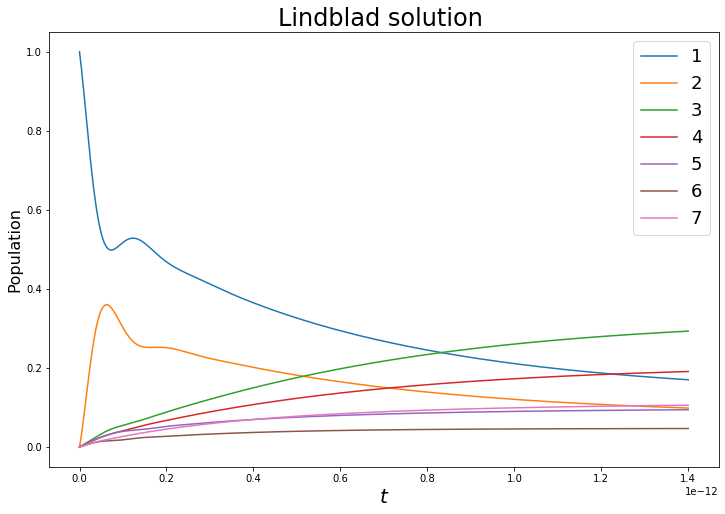

In [79]:
#To be more accurate let us use 300 Kelvin as the temperature
Temperature = 300 * 0.6949 * 3e10 * 2 * pi
lam = 35 * 3e10 * 2 * pi  #35 cm^-1
gamma = (1/(50e-15))   #1/50 fs
tlist = linspace(0,1.4e-12,1000)
outputFMO = mesolve(H, psi0, tlist, collapse_list)
fig, axes = plt.subplots(1,1, figsize=(12,8))
for m,Q in enumerate(Q_list):
    axes.plot(tlist, expect(outputFMO.states,Q),label=m+1)
axes.set_xlabel(r'$t$', fontsize=20)
axes.set_ylabel(r"Population", fontsize=16);

axes.set_title('Lindblad solution ',fontsize=24)
axes.legend(loc=0, fontsize=18)
#fig.savefig("fmosec2.png")

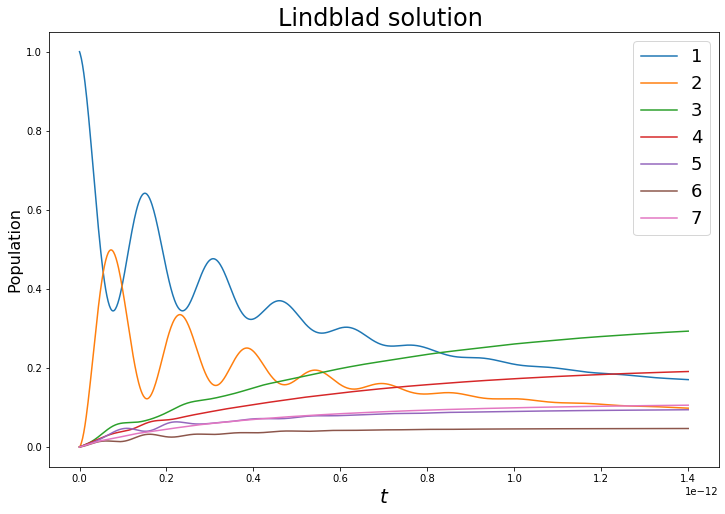

In [64]:
#To be more accurate let us use 300 Kelvin as the temperature
Temperature = 300 * 0.6949 * 3e10 * 2 * pi
lam = 35 * 3e10 * 2 * pi  #35 cm^-1
gamma = (1/(50e-15))   #1/50 fs
tlist = linspace(0,1.4e-12,1000)
outputFMO = mesolve(H, psi0, tlist, collapse_list)
fig, axes = plt.subplots(1,1, figsize=(12,8))
for m,Q in enumerate(Q_list):
    axes.plot(tlist, expect(outputFMO.states,Q),label=m+1)
axes.set_xlabel(r'$t$', fontsize=20)
axes.set_ylabel(r"Population", fontsize=16);

axes.set_title('Lindblad solution ',fontsize=24)
axes.legend(loc=0, fontsize=18)
#fig.savefig("fmosec2.png")

Using the same parameters as above, $\lambda = 35$ cm$^{-1}$, $1/\gamma = 50$ fs, $T=300$K, we find...
<center>
<img src ="fmosec2.png">
</center>
    

In [65]:
#Calculates  generic non-secular master equation
#This is experimental, and should be used with a grain of salt
#spectral density/w at w=0
def J02(energy):
    #underdamped brownian oscillator
    lam = 35 * 3e10 * 2 * pi
    gamma = (1/(50e-15))
    return 2 * lam * gamma /(np.pi * ((gamma**2)))



def J0(energy):
    #underdamped brownian oscillator
    lam = 35 * 3e10 * 2 * pi
    gamma = (1/(50e-15))
    return 2 * lam * gamma * (energy)/( pi * ((energy**2) + (gamma**2)))


import time
import warnings
import numpy as np
import scipy.sparse as sp
from numpy import matrix
from numpy import linalg
from qutip import spre, spost, sprepost, thermal_dm, mesolve, Odeoptions
from qutip import tensor, identity, destroy, sigmax, sigmaz, basis, qeye, dims
from qutip.ui.progressbar import BaseProgressBar, TextProgressBar
def Lnonsec(Hsys, Q_list, tlist, initial_state, Temperature,
            return_vals, eigen_sparse=False, options=None,progress_bar=None):
    

    if progress_bar is None:
        progress_bar = BaseProgressBar()
    elif progress_bar is True:
        progress_bar = TextProgressBar()
        
    if options is None:
        options = Options()
    output = None
    
   
    
    
    
    dimensions = dims(Q_list[0])
    Nmax = dimensions[1][0]        #hilbert space 
    #Nmax = 2       #hilbert space 
    
    H = Hsys
    L=0
    PsipreEta=0
    PsipreX=0

    all_energy, all_state = H.eigenstates(sparse=eigen_sparse)
    for Q in Q_list:
        Apre = spre(Q)
        Apost = spost(Q)
        for j in range(Nmax):
            for k in range(Nmax):
                A = Q.matrix_element(all_state[j].dag(), all_state[k])
                #A = sh.matrix_element(all_state[j].dag(), all_state[k])
                delE = (all_energy[j] - all_energy[k])
                if np.absolute(A) > 0.0:
                    if abs(delE) > 0.0:
                        #X = (0.5 * np.pi * gamma*(all_energy[j] - all_energy[k])
                        X = (0.5  * np.pi * J0(all_energy[j] - all_energy[k])
                             * (np.cosh((all_energy[j] - all_energy[k]) /
                                (2 * Temperature))
                             / (np.sinh((all_energy[j] - all_energy[k]) /
                                (2 * Temperature)))) * A)
                        #eta = (0.5 * np.pi * gamma *
                        eta = (0.5 *  np.pi *
                               J0(all_energy[j] - all_energy[k]) * A)
                        PsipreX = PsipreX + X * all_state[j]*all_state[k].dag()
                        PsipreEta = PsipreEta + (eta * all_state[j]
                                                 * all_state[k].dag())
                    else:
                        #X =0.5  * np.pi* J0(0.) * A * 2 * Temperature
                        X = 0.5  * np.pi* J02(0.)* A  * 2 * Temperature
                        
                        #X =0.5 * np.pi * gamma * A * 2 * Temperature
                        PsipreX=PsipreX+X*all_state[j]*all_state[k].dag()

        A = Q
        L += ((-spre(A * PsipreX)) + (sprepost(A, PsipreX))
             +(sprepost(PsipreX, A)) + (-spost(PsipreX * A))
             +(spre(A * PsipreEta)) + (sprepost(A, PsipreEta))
             +(-sprepost(PsipreEta, A)) + (-spost(PsipreEta * A)))           

    #Setup the operators and the Hamiltonian and the master equation 
    #and solve for time steps in tlist
    psi0 = ( initial_state)
    output = mesolve(H, psi0, tlist, [L], return_vals, options=options,progress_bar=progress_bar)
    
    return output

For completeness, lets also look at the solution when we include the dephasing terms we ignored (as well as some non-secular contributions)...

<center>
<img src ="fmononsec2.png">
</center>

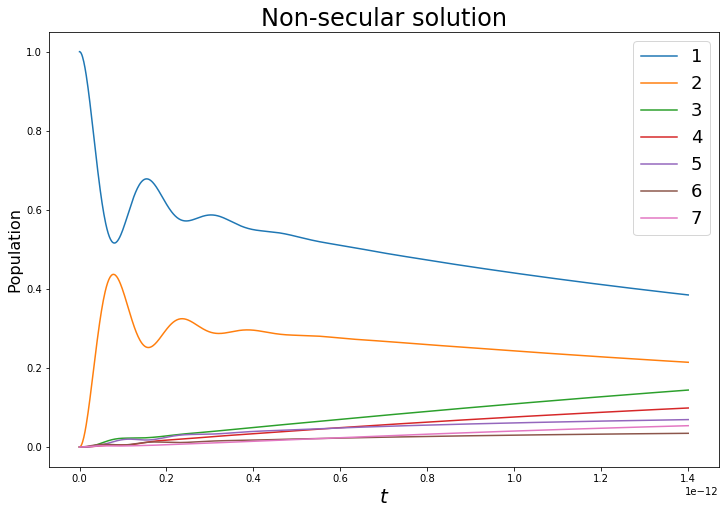

In [66]:
resultMEnonsec = Lnonsec(H, Q_list, tlist, psi0, Temperature, [])
fig, axes = plt.subplots(1,1, figsize=(12,8))
for m,Q in enumerate(Q_list):
    axes.plot(tlist, expect(resultMEnonsec.states,Q),label=m+1)
axes.set_xlabel(r'$t$', fontsize=20)
axes.set_ylabel(r"Population", fontsize=16);

axes.set_title('Non-secular solution',fontsize=24)
axes.legend(loc=0, fontsize=18)
#fig.savefig("fmononsec2.png")

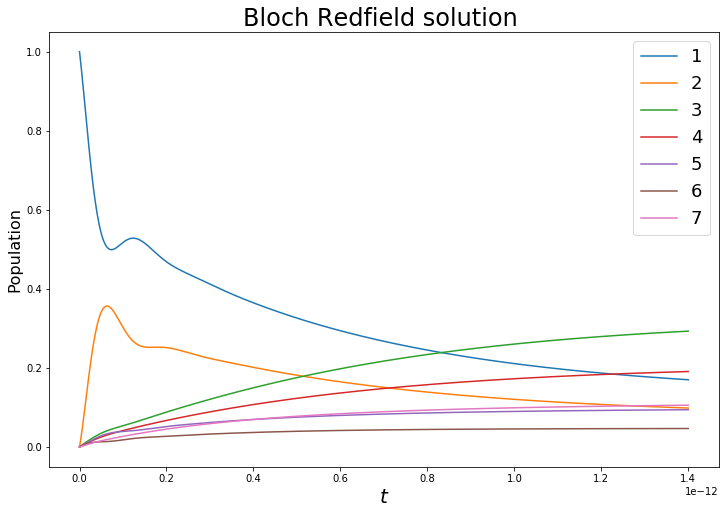

In [85]:
#To be more accurate let us use 300 Kelvin as the temperature
Temperature = 300 * 0.6949 * 3e10 * 2 * pi
lam = 35 * 3e10 * 2 * pi  #35 cm^-1
gamma = (1/(50e-15))   #1/50 fs
tlist = linspace(0,1.4e-12,1000)

beta = 1/Temperature
DL = " 2*pi* 2.0 * {lam} / (pi * {gamma} * {beta})  if (w==0) else 2*pi*(2.0*{lam}*{gamma} *w /(pi*(w**2+{gamma}**2))) * ((1/(exp((w) * {beta})-1))+1)".format(gamma=gamma, beta = beta, lam = lam)

optionsODE = Options(nsteps=15000, store_states=True,rtol=1e-12,atol=1e-12)
outputBR  =  brmesolve(H, psi0, tlist, a_ops=[[Q,DL] for Q in Q_list], options = optionsODE)


fig, axes = plt.subplots(1,1, figsize=(12,8))
for m,Q in enumerate(Q_list):
    axes.plot(tlist, expect(outputBR.states,Q),label=m+1)
#for m,Q in enumerate(Q_list):
#    axes.plot(tlist, expect(outputFMO.states,Q),linestyle="--",label=m+1)
axes.set_xlabel(r'$t$', fontsize=20)
axes.set_ylabel(r"Population", fontsize=16);

axes.set_title('Bloch Redfield solution ',fontsize=24)
axes.legend(loc=0, fontsize=18)
fig.savefig("fmoBR.png")


Not too dissimilliar time-scales appear...  but is our approach valid here?  If the memory time of the bath is between $50$ and $200$ fs, and the coupling strength is of the order of 35 cm$^{-1}$, both values that may violate the Born-Markov approximations.

<center>
<img src="fmoexperiment.png" height="600" width="600"/>
</center>


    
## Part 3


- Beyond the Master Equation: Exact numerical methods for bosonic baths

    - The Hierarchy Equations of Motion

- Comparing different methods
- Evaluating efficiency
- Conclusions 

# Non-Markovian systems

In other situations the assumption that $\tau_E \ll \tau_S, \tau_R$ also breaks down. E.g.,

- Molecular systems strongly interacting with their environment, e.g., energy transfer in photosynthetic complexes strongly couples to protein "vibrations".
- Hyperfine Interaction between electron spins and nuclear spins in quantum dots 
- Superconducting qubits strongly coupled to open transmission lines
- Recent evidence suggests signifcant non-Markovian noise in IBM-Q simulations


A recent review:
"Dynamics of non-Markovian open quantum systems"
Inés de Vega and Daniel Alonso
Rev. Mod. Phys. 89, 015001

# Bosonic environments

The choice of a bosonic environment, or in general, a Gaussian environment, simplifies the problem to some degree.  

Using the fact that the cumulants of a <span style="color:red">Gaussian</span> system truncate at second order, one can show (see Breur and Petruccione, 3.6.4, or Jian Ma et al, PRA 2012) that there is a formal solution (assuming that at $t=0$, $\rho(0) = \rho_S(0)\otimes \rho_E(0)$ ),





$$ \tilde{\rho}_S(t) = \mathcal{T} \exp\left( - \int_0^t dt_2 \int_0^{t_2} A^{\times}(t_2)[C^R(t_2-t_1) A(t_1)^{\times} + i C^I(t_2-t_1)A(t_1)^{\circ}]\right)\rho_S(0) $$

Where, as before $A(t)$ is the system operator which couples to the environment, 

$C(t)$ is the correlation function of the environment, split into real and imaginary parts, 

$A^{\times}B \equiv [A,B]$ and $A^{\circ}B = \{A,B\}$.  

$\mathcal{T}$ is the time-ordering operator, which means that all terms have to reordered so that time arguments increase from right to left.


Directly solving or using this equation is intractable;  however, by assuming that we can write the correlation functions as a sum of exponentials, and taking repeated time-derivatives, one can derive the <span style="color:red">hierarchy equations of motion.</span>

Again assuming that the initial bath state is a thermal state, and recalling that 

$$J(\omega) = \sum_k g_k^2\delta(\omega-\omega_k)$$


$$C(t)= \int_0^{\infty}d\omega \{J(\omega) e^{i\omega t}n(\omega)+ J(\omega) e^{-i\omega t}[1+n(\omega)]\}$$

we can rewrite  this as

$$C(t)= \int_0^{\infty}d\omega J(\omega)\left[ \mathrm{coth}\left(\frac{\beta\omega}{2}\right)\cos \left(\omega t\right) - i \sin \left(\omega t)\right)\}\right]$$

$\beta = 1/ k_B T$, the temperature of the initial environment state.



The fact that the environment is fully described by 2nd order correlation functions allows us to identify important degrees of freedom in the environment, and include them in the simulation.  We then can have a model which captures quantum effects (coherence/entanglement between system and environment).

For some choices of spectral density, this does have the analytical form of a sum of exponentials, e.g. a Lorentzian.  Traditionally, the Drude-Lorentz form is chosen,

$$J(\omega) = \frac{\omega}{\pi} \frac{2\lambda \gamma}{(\gamma^2 + \omega^2)} $$
 
Inserting this into $C(\tau)$ one finds,



$$C(\tau) = \sum_{k=0}^{\infty} c_k e^{-v_k|\tau|}$$


Where $v_k = 2 \pi k/\beta$ for $k\geq1$, and $v_0 = \gamma$, and $c_0 = \lambda \gamma [-i + \mathrm{cot}\left(\beta \gamma /2\right)]$ and $c_k = (4 \lambda \gamma/\beta) v_k/(v_k^2 - \gamma^2)$


In [27]:
def cot(x):
    return 1./np.tan(x)

E.g., for the parameters given before $\gamma =1/50$ fs, $\lambda = 35$ cm$^{-1}$, $T$ =  300K

<center>
<img src="drude.png" width=1200 /> 
</center>

In [ ]:
def c(t):
    c_temp =[]
    c_temp.append(lam * gamma * (-1.0j + cot(gamma / (2 * T))) * np.exp(-gamma * t))
    for k in range(1,5):
        vk = 2 * np.pi * k * T
        c_temp.append( (4 * lam * gamma * T * vk / (vk**2 - gamma**2))  * np.exp(- vk * t) ) 
    return c_temp

def J0(energy):
    #underdamped brownian oscillator
    return 2 * lam * gamma * (energy)/( pi* ((energy**2) + (gamma**2)))

/home/neill/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


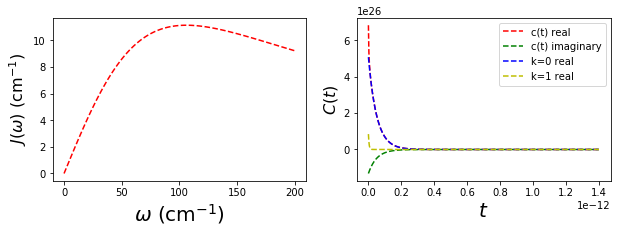

In [172]:
#A quick plot of the spectral density and environment correlation functions

wlist = linspace(0, 200*3e10*2*pi,100)
lam = 35 * 3e10 * 2 * pi
gamma = (1/(50e-15))
T = Temperature = 300 * 0.6949 * 3e10 * 2 * pi

#gamma = 1.0

#lam = 2.5/2.

#T = 1/0.95
tlist = linspace(0,1.4e-12,1000)


J = [J0(w)/(3e10*2*pi) for w in wlist]


fig, axes = plt.subplots(1, 2, sharex=False, figsize=(10,3))

fig.subplots_adjust(hspace=0.1) # reduce space between plots

axes[0].plot(wlist/(3e10*2*pi), J, color='r',ls='--')
axes[0].set_xlabel(r'$\omega$ (cm$^{-1}$)', fontsize=20)
axes[0].set_ylabel(r"$J(\omega)$ (cm$^{-1}$)", fontsize=16);
axes[1].plot(tlist, [np.real(sum(c(t))) for t in tlist], color='r',ls='--',label="c(t) real")
axes[1].plot(tlist, [np.imag(sum(c(t))) for t in tlist], color='g',ls='--',label="c(t) imaginary")
axes[1].plot(tlist, [c(t)[0] for t in tlist], color='b',ls='--',label="k=0 real")
axes[1].plot(tlist, [c(t)[1] for t in tlist], color='y',ls='--',label="k=1 real")
axes[1].set_xlabel(r'$t$', fontsize=20)
axes[1].set_ylabel(r"$C(t)$", fontsize=16);

axes[1].legend(loc=0)

fig.savefig("drude.png")

Given these assumptions (<span style="color:red">seperable initial condition, bosonic environment initially in a thermal state</span>), one can derive the <span style="color:blue">Tanimura and Kubo HEOM</span>, which looks like the following

$$\dot{\rho}^n(t) = -(iH_S^{\times} + \sum_{k=0}^M\, n_k \,v_k)\,\rho^{n}(t)$$
$$ - i \sum_{k=0}^M\, A^{\times}\, \rho^{n^+_k}(t)$$
$$ -i  \sum_{k=0}^M n_k(c_k\, A\,\rho^{n^-_k}(t) - c_k^*\,\rho^{n^-_k}(t)\, A)$$

This is a set of coupled equations for a hierarchy of "density matrices" labelled by an index $n$.  

In this case $n = \{n_1,n_2,..n_m,...,n_M\}$: it contains M indices, $0$ to $M$, a cut-off in the number of exponentials.  

Each element runs from $0$ to $N_c$, an additional cut-off term.

$n^+_k$ means one increases the $k$th component of $n_k$ by $1$, while  $n^-_k$ means decrease by $1$. $n= \{0,0,0,..0\}$ denotes the physical density matrix. All the rest are "auxiliary" non-normalized density matrices.

# Comparing BMS master equation and the HEOM

Before looking again at the FMO example, lets try and see the breakdown of the BMS (Born-Markov-Secular) master equation as we increase the bath correlation time with some simpler (unitless) parameters, and with just a 2-level system.

First try lets try some parameters where BMS should work (in units of system emergy $\epsilon$):

$\gamma=10 \epsilon$  $\quad$ Very large: short memory time, Markovian

$\lambda = 0.05 \epsilon$  $\quad$ Very weak: Born approximation should be valid.

$\beta = \epsilon$  $\quad$ Overall dissipation rate not too large because of temperature? Secular approximation should be ok.

In [16]:
#Calculates  generic non-secular master equation
#This is experimental, and should be used with a grain of salt


import time
import warnings
import numpy as np
import scipy.sparse as sp
from numpy import matrix
from numpy import linalg
from qutip import spre, spost, sprepost, thermal_dm, mesolve, Odeoptions
from qutip import tensor, identity, destroy, sigmax, sigmaz, basis, qeye, dims
from qutip.ui.progressbar import BaseProgressBar, TextProgressBar
def Lnonsec(Hsys, Q, tlist, initial_state, Temperature,
            return_vals, eigen_sparse=False, options=None,progress_bar=None):
    

    if progress_bar is None:
        progress_bar = BaseProgressBar()
    elif progress_bar is True:
        progress_bar = TextProgressBar()
        
    if options is None:
        options = Options()
    output = None
    
    dot_energy, dot_state = Hsys.eigenstates(sparse=eigen_sparse)
    deltaE = dot_energy[1] - dot_energy[0]
    
    
    
    
    dimensions = dims(Q)
    Nmax = dimensions[1][0]        #hilbert space 
    #Nmax = 2       #hilbert space 
    
    H = Hsys
    L=0
    PsipreEta=0
    PsipreX=0

    all_energy, all_state = H.eigenstates(sparse=eigen_sparse)
    Apre = spre(Q)
    Apost = spost(Q)
    for j in range(Nmax):
        for k in range(Nmax):
            A = Q.matrix_element(all_state[j].dag(), all_state[k])
            #A = sh.matrix_element(all_state[j].dag(), all_state[k])
            delE = (all_energy[j] - all_energy[k])
            if np.absolute(A) > 0.0:
                if abs(delE) > 0.0:
                    #X = (0.5 * np.pi * gamma*(all_energy[j] - all_energy[k])
                    X = (0.5  * np.pi * J0(all_energy[j] - all_energy[k])
                         * (np.cosh((all_energy[j] - all_energy[k]) /
                            (2 * Temperature))
                         / (np.sinh((all_energy[j] - all_energy[k]) /
                            (2 * Temperature)))) * A)
                    #eta = (0.5 * np.pi * gamma *
                    eta = (0.5 *  np.pi *
                           J0(all_energy[j] - all_energy[k]) * A)
                    PsipreX = PsipreX + X * all_state[j]*all_state[k].dag()
                    PsipreEta = PsipreEta + (eta * all_state[j]
                                             * all_state[k].dag())
                else:
                    #X =0.5  * np.pi* J0(0.) * A * 2 * Temperature
                    X =0.5  * np.pi* J02(0.)* A  * 2 * Temperature
                    #X =0.5 * np.pi * gamma * A * 2 * Temperature
                    PsipreX=PsipreX+X*all_state[j]*all_state[k].dag()

    A = Q
    L = ((-spre(A * PsipreX)) + (sprepost(A, PsipreX))
         +(sprepost(PsipreX, A)) + (-spost(PsipreX * A))
         +(spre(A * PsipreEta)) + (sprepost(A, PsipreEta))
         +(-sprepost(PsipreEta, A)) + (-spost(PsipreEta * A)))           

    #Setup the operators and the Hamiltonian and the master equation 
    #and solve for time steps in tlist
    psi0 = ( initial_state)
    output = mesolve(H, psi0, tlist, [L], return_vals, options=options,progress_bar=progress_bar)
    
    return output
              

In [17]:
eps = 1.0    # Tunnelling term
Hsys =  0.5 * eps * sigmax()
#Coupling operator to the bath:
sm = destroy(2).dag()
Q = sigmaz()


gamma = 10.                # Cutoff frequency of DL spectral density
lam = 0.05           # Coupling strength of DL spectral density

temperature = 1.     # Temperature of environment

tlist = np.linspace(0, 20, 800) #time steps

psi0=(basis(2,0)+basis(2,1))/np.sqrt(2.)  #initial state of system.
psi0=basis(2,0)
rho0=psi0*psi0.dag()

Ncut = 10
#K is the matsubara terms; if temperature < system energy,  N>1
Nk=4


In [18]:

def J0(energy):
    #underdamped brownian oscillator
    return 2 * lam * gamma * (energy)/(np.pi * ((energy**2) + (gamma**2)))

def nbs(energy,Temperature):
    beta = 1./Temperature
    
    return 1./(np.exp(energy*beta) - 1.)

#spectral density/w at w=0
def J02(energy):
    #underdamped brownian oscillator
    return 2 * lam * gamma /(np.pi * ((gamma**2)))






The relaxation time is roughly 
$\tau_R \approx 1/\pi J(\epsilon)n(\epsilon)$

(recall everything here is in units of $\epsilon=1$)

In [36]:
print(1/(np.pi * J0(1.0) * nbs(1.0,temperature)))


173.54646467436356


The largest environment correlation times are
$\tau_E \approx 1/\gamma,  1/2 \pi k_B T $

In [37]:
print(1/gamma)
print(1/(2 * np.pi * temperature))

0.1
0.15915494309189535


The system time scale is $\tau_S \approx 1/\epsilon$, so $\tau_E \ll \tau_S \ll \tau_R$ for the Born-Markov-Secular approximation seems valid. Let's check..

In [19]:
# Configure the solver
from qutip.nonmarkov.heom import HSolverDL
hsolver = HSolverDL(Hsys, Q, lam, temperature, Ncut, Nk, gamma, stats=True,)
resultHEOM = hsolver.run(rho0, tlist)

In [36]:
beta = 1/temperature
DL = " 2*pi* 2.0 * {lam} / (pi * {gamma} * {beta})  if (w==0) else 2*pi*(2.0*{lam}*{gamma} *w /(pi*(w**2+{gamma}**2))) * ((1/(exp((w) * {beta})-1))+1)".format(gamma=gamma, beta = beta, lam = lam)

optionsODE = Options(nsteps=15000, store_states=True,rtol=1e-12,atol=1e-12)
outputBR  =  brmesolve(Hsys, rho0, tlist, a_ops=[[sigmaz(),DL]], options = optionsODE)




In [20]:
#lets compare to the BMS solution,
plus =  (basis(2,0)+basis(2,1))/np.sqrt(2.) 
minus = (basis(2,0)-basis(2,1))/np.sqrt(2.) 
smt = minus*plus.dag()
resultMEsec = mesolve(Hsys, rho0, tlist, [np.sqrt(2*np.pi*J0(1.0)*(nbs(1.0,temperature)+1))*smt,np.sqrt(2*np.pi*J0(1.0)*nbs(1.0,temperature))*smt.dag()], [])
resultMEnonsec = Lnonsec(Hsys, Q, tlist, rho0, temperature, [])
    

<center>
<img src="heom1.png" width=800 /> 
</center>

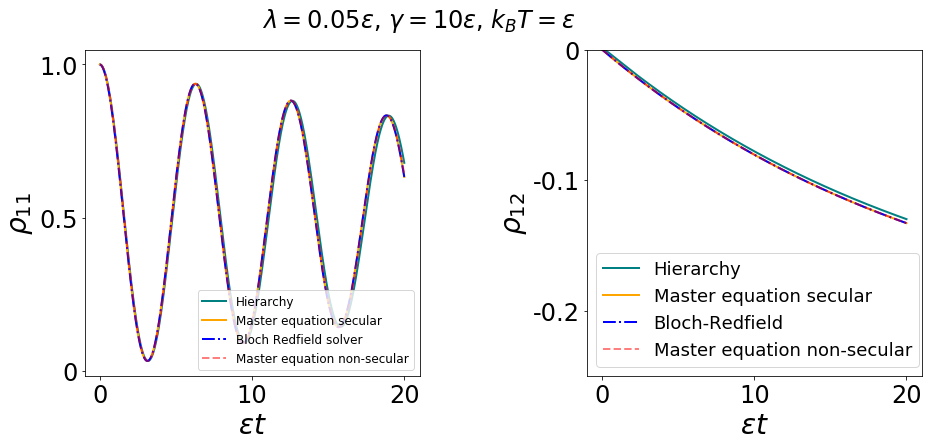

In [39]:
P1p=rho0
psi01 = basis(2,1)
P12p=psi0*psi01.dag()

P1HEOM=expect(resultHEOM.states,P1p)
P12HEOM=expect(resultHEOM.states,P12p)


P1ME=expect(resultMEsec.states,P1p)
P12ME=expect(resultMEsec.states,P12p)

P1BR=expect(outputBR.states,P1p)
P12BR=expect(outputBR.states,P12p)

import matplotlib.gridspec as gridspec

P1MENS=expect(resultMEnonsec.states,P1p)
P12MENS=expect(resultMEnonsec.states,P12p)

fig = plt.figure(figsize=(15,6))
gs1 = gridspec.GridSpec(1, 2)
gs1.update(wspace=.5, hspace=1.3) # set the spacing between axes. 
########################################################################
axes1 = plt.subplot(gs1[0])



axes1.plot(tlist, P1HEOM,  color="teal", ls="-", alpha=1, linewidth=2.0,label="Hierarchy")
axes1.plot(tlist , P1ME,  color="orange", ls="-", alpha=1, linewidth=2.0,label="Master equation secular")
axes1.plot(tlist , P1BR,  color="blue", ls="-.", alpha=1, linewidth=2.0,label="Bloch Redfield solver")
axes1.plot(tlist , P1MENS,  color="red", ls="--", alpha=0.5, linewidth=2.0,label="Master equation non-secular")

axes1.set_ylabel(r'$\rho_{11}$', fontsize=28)
axes1.set_xlabel(r'$\epsilon t$', fontsize=28)

ticks = [0,0.5,1.0]
axes1.set_yticks(ticks)
axes1.set_yticklabels(["0","0.5","1.0"], fontsize=24);

ticks = [.0,10.,20.]
axes1.set_xticks(ticks)
axes1.set_xticklabels(["0","10","20"], fontsize=24);
axes1.legend(loc=4, fontsize=12)

axes1.set_title('$\lambda=0.05 \epsilon $, $\gamma = 10 \epsilon $, $k_{B}T=\epsilon $ ',fontsize=24,y=1.05,x=1.0)

axes2 = plt.subplot(gs1[1])

axes2.plot(tlist, P12HEOM,  color="teal", ls="-", alpha=1, linewidth=2.0,label="Hierarchy")
axes2.plot(tlist , P12ME,  color="orange", ls="-", alpha=1, linewidth=2.0,label="Master equation secular")
axes2.plot(tlist , P12BR,  color="blue", ls="-.", alpha=1, linewidth=2.0,label="Bloch-Redfield")
axes2.plot(tlist , P12MENS,  color="red", ls="--", alpha=0.5, linewidth=2.0,label="Master equation non-secular")

axes2.set_xlabel(r'$\epsilon t$', fontsize=28)
axes2.set_ylabel(r'$\rho_{12}$', fontsize=28)

ticks = [0,-.1,-.2]
axes2.set_yticks(ticks)
axes2.set_yticklabels(["0","-0.1","-0.2"], fontsize=24);

ticks = [.0,10.,20.]
axes2.set_xticks(ticks)
axes2.set_xticklabels(["0","10","20"], fontsize=24);

#axes1.set_xlim(-1.2, 1.2);
axes2.set_ylim(-0.25,0.);

axes2.legend(loc=0, fontsize=18)


#fig.savefig("heom1.png")



Next try lets try some parameters where BMS should break, 

$\gamma=0.1 \epsilon$  $\quad$ Narrow environment, long memory time... Non-Markovian...

$\lambda = 0.2 \epsilon$  $\quad$ Large coupling, Born-approximation breaks.

$\beta = \epsilon$  $\quad$ Same as before...

In [40]:
eps = 1.0    # Tunnelling term
Hsys =  0.5 * eps * sigmax()
#Coupling operator to the bath:
sm = destroy(2).dag()
Q = sigmaz()


gamma = .1                # Cutoff frequency of DL spectral density
lam = 0.2           # Coupling strength of DL spectral density

temperature = 1.     # Temperature of environment

tlist = np.linspace(0, 20, 800) #time steps

Ncut = 25
#K is the matsubara terms; if temperature < system energy,  N>1
Nk=3


In [41]:
def J0(energy):
    #underdamped brownian oscillator
    return 2 * lam * gamma * (energy)/(np.pi * ((energy**2) + (gamma**2)))
def nbs(energy,Temperature):
    beta=1./Temperature
    
    return 1./(np.exp(energy*beta) - 1.)

#spectral density/w at w=0
def J02(energy):
    #underdamped brownian oscillator
    return 2 * lam * gamma /(np.pi * ((gamma**2)))





The relaxation time is roughly 
$\tau_R \approx 1/\pi J(\epsilon)n(\epsilon)$


In [42]:
print(1./(np.pi*J0(1.0)*nbs(1.0,temperature)))


43.386616168590876


The largest environment correlation times are
$\tau_E \approx 1/\gamma,  1/2 \pi k_B T $

In [43]:
print(1/gamma)
print(1/(2 * np.pi * temperature))

10.0
0.15915494309189535


The system time scale is $\tau_S \approx 1/\epsilon$, so $\tau_S \ll \tau_R$ seems ok, but now $\tau_E > \tau_S$, so Markov approximation should break

In [42]:
# Configure the solver
from qutip.nonmarkov.heom import HSolverDL
hsolver = HSolverDL(Hsys, Q, lam, temperature, Ncut, Nk, gamma, stats=True)
resultHEOM = hsolver.run(rho0, tlist)

In [43]:
#lets compare to the BMS solution,
 
resultMEsec = mesolve(Hsys, rho0, tlist, [np.sqrt(2*np.pi*J0(1.0)*(nbs(1.0,temperature)+1.))*smt,np.sqrt(2*np.pi*J0(1.0)*nbs(1.0,temperature))*smt.dag()], [])
resultMEnonsec = Lnonsec(Hsys, Q, tlist, rho0, temperature, [])

In [44]:
DL = " 2*pi* 2.0 * {lam} / (pi * {gamma} * {beta})  if (w==0) else 2*pi*(2.0*{lam}*{gamma} *w /(pi*(w**2+{gamma}**2))) * ((1/(exp((w) * {beta})-1))+1)".format(gamma=gamma, beta = beta, lam = lam)

optionsODE = Options(nsteps=15000, store_states=True,rtol=1e-12,atol=1e-12)
outputBR  =  brmesolve(Hsys, rho0, tlist, a_ops=[[sigmaz(),DL]], options = optionsODE)


<center>
<img src="heom2alt.png" width=800 />
</center>

/home/neill/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


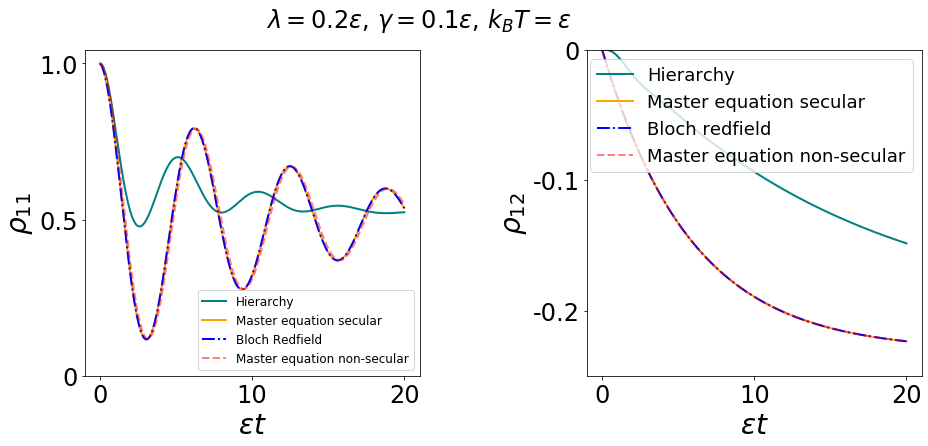

In [45]:

P1p=rho0
#psi01 = (basis(2,0)-basis(2,1))/np.sqrt(2.)
psi01 = basis(2,1)
P12p=psi0*psi01.dag()

P1HEOM=expect(resultHEOM.states,P1p)
P12HEOM=expect(resultHEOM.states,P12p)


P1ME=expect(resultMEsec.states,P1p)
P12ME=expect(resultMEsec.states,P12p)

P1BR=expect(outputBR.states,P1p)
P12BR=expect(outputBR.states,P12p)

P1MENS=expect(resultMEnonsec.states,P1p)
P12MENS=expect(resultMEnonsec.states,P12p)

import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(15,6))

gs1 = gridspec.GridSpec(1, 2)
gs1.update(wspace=.5, hspace=1.3) # set the spacing between axes. 
########################################################################
axes1 = plt.subplot(gs1[0])

axes1.plot(tlist, P1HEOM,  color="teal", ls="-", alpha=1, linewidth=2.0,label="Hierarchy")
axes1.plot(tlist , P1ME,  color="orange", ls="-", alpha=1, linewidth=2.0,label="Master equation secular")
axes1.plot(tlist , P1BR,  color="blue", ls="-.", alpha=1, linewidth=2.0,label="Bloch Redfield")
axes1.plot(tlist , P1MENS,  color="red", ls="--", alpha=0.5, linewidth=2.0,label="Master equation non-secular")



axes1.set_ylabel(r'$\rho_{11}$', fontsize=28)
axes1.set_xlabel(r'$\epsilon t$', fontsize=28)

ticks = [0,0.5,1.0]
axes1.set_yticks(ticks)
axes1.set_yticklabels(["0","0.5","1.0"], fontsize=24);

ticks = [.0,10.,20.]
axes1.set_xticks(ticks)
axes1.set_xticklabels(["0","10","20"], fontsize=24);

axes1.legend(loc=4, fontsize=12)



axes1.set_title('$\lambda=0.2 \epsilon$, $\gamma = 0.1 \epsilon$, $k_{B}T=\epsilon $ ',fontsize=24,y=1.05,x=1.0)



axes2 = plt.subplot(gs1[1])


axes2.plot(tlist, P12HEOM,  color="teal", ls="-", alpha=1, linewidth=2.0,label="Hierarchy")
axes2.plot(tlist , P12ME,  color="orange", ls="-", alpha=1, linewidth=2.0,label="Master equation secular")
axes2.plot(tlist , P12BR,  color="blue", ls="-.", alpha=1, linewidth=2.0,label="Bloch redfield")
axes2.plot(tlist , P12MENS,  color="red", ls="--", alpha=0.5, linewidth=2.0,label="Master equation non-secular")

axes2.set_xlabel(r'$\epsilon t$', fontsize=28)
axes2.set_ylabel(r'$\rho_{12}$', fontsize=28)

ticks = [0,-.1,-.2]
axes2.set_yticks(ticks)
axes2.set_yticklabels(["0","-0.1","-0.2"], fontsize=24);

ticks = [.0,10.,20.]
axes2.set_xticks(ticks)
axes2.set_xticklabels(["0","10","20"], fontsize=24);

#axes1.set_xlim(-1.2, 1.2);
axes2.set_ylim(-0.25,0.);

axes2.legend(loc=0, fontsize=18)



#fig.savefig("heom2alt.png")


Next try lets try some parameters where secular approximation should break, but Born-Markov is ok 

$\gamma=10 \epsilon$  $\quad$
As before (Markovian)

$\lambda = 0.5 \epsilon$  $\quad$ 
Strong coupling..

$\beta = 0.25\epsilon$  $\quad$
Large temperature...

In [54]:
eps = 1.0    # Tunnelling term
Hsys =  0.5 * eps * sigmax()
#Coupling operator to the bath:
sm = destroy(2).dag()
Q = sigmaz()


gamma = 10.                # Cutoff frequency of DL spectral density
lam = .5           # Coupling strength of DL spectral density

temperature = 4.     # Temperature of environment

tlist = np.linspace(0, 20, 800) #time steps

psi0=basis(2,0)
#psi0=basis(2,0)  #initial state of system.
rho0=psi0*psi0.dag()

Ncut = 20
#K is the matsubara terms; if temperature < system energy,  N>1
Nk=3


In [55]:
def J0(energy):
    #underdamped brownian oscillator
    return 2 * lam * gamma * (energy)/(np.pi * ((energy**2) + (gamma**2)))
def nbs(energy,Temperature):
    beta=1./Temperature
    
    return 1./(np.exp(energy*beta) - 1.)

#spectral density/w at w=0
def J02(energy):
    #underdamped brownian oscillator
    return 2 * lam * gamma /(np.pi * ((gamma**2)))




The relaxation time is roughly 
$\tau_R \approx 1/\pi J(\epsilon)n(\epsilon)$


In [48]:
print(1./(np.pi*J0(1.0)*(nbs(1.0,temperature)+1.)))



2.2341120909788104


The largest environment correlation times are
$\tau_E \approx 1/\gamma,  1/2 \pi k_B T $

In [49]:
print(1/gamma)
print(1/(2 * np.pi * temperature))

0.1
0.039788735772973836


The system time scale is $\tau_S \approx 1/\epsilon$, so now $\tau_R \approx \tau_S$, so Secular appoximation should break

In [56]:
# Configure the solver
from qutip.nonmarkov.heom import HSolverDL
hsolver = HSolverDL(Hsys, Q, lam, temperature, Ncut, Nk, gamma, stats=True)
resultHEOM = hsolver.run(rho0, tlist)

In [57]:
#lets compare to the BMS solution,
 
resultMEsec = mesolve(Hsys, rho0, tlist, [np.sqrt(2*np.pi*J0(1.0)*(nbs(1.0,temperature)+1.))*smt,np.sqrt(2*np.pi*J0(1.0)*nbs(1.0,temperature))*smt.dag()], [])
resultMEnonsec = Lnonsec(Hsys, Q, tlist, rho0, temperature, [])

In [58]:
beta = 1/temperature
DL = " 2*pi* 2.0 * {lam} / (pi * {gamma} * {beta})  if (w==0) else 2*pi*(2.0*{lam}*{gamma} *w /(pi*(w**2+{gamma}**2))) * ((1/(exp((w) * {beta})-1))+1)".format(gamma=gamma, beta = beta, lam = lam)

optionsODE = Options(nsteps=15000, store_states=True,rtol=1e-12,atol=1e-12)
outputBR  =  brmesolve(Hsys, rho0, tlist, a_ops=[[sigmaz(),DL]], options = optionsODE)


<center>
<img src="heom4.png" width=800 />
</center>

/home/neill/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


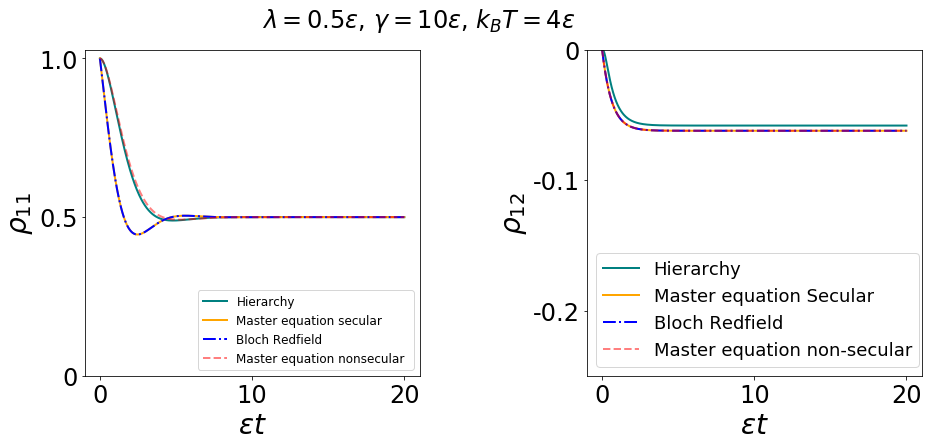

In [59]:

P1p=rho0
psi01 = (basis(2,1))

P12p=psi0*psi01.dag()

P1HEOM=expect(resultHEOM.states,P1p)
P12HEOM=expect(resultHEOM.states,P12p)

P1BR=expect(outputBR.states,P1p)
P12BR=expect(outputBR.states,P12p)

P1ME=expect(resultMEsec.states,P1p)
P12ME=expect(resultMEsec.states,P12p)


P1MENS=expect(resultMEnonsec.states,P1p)
P12MENS=expect(resultMEnonsec.states,P12p)

import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(15,6))

gs1 = gridspec.GridSpec(1, 2)
gs1.update(wspace=.5, hspace=1.3) # set the spacing between axes. 
########################################################################
axes1 = plt.subplot(gs1[0])

axes1.plot(tlist, P1HEOM,  color="teal", ls="-", alpha=1, linewidth=2.0,label="Hierarchy")
axes1.plot(tlist , P1ME,  color="orange", ls="-", alpha=1, linewidth=2.0,label="Master equation secular")
axes1.plot(tlist , P1BR,  color="blue", ls="-.", alpha=1, linewidth=2.0,label="Bloch Redfield")
axes1.plot(tlist , P1MENS,  color="red", ls="--", alpha=0.5, linewidth=2.0,label="Master equation nonsecular ")



axes1.set_ylabel(r'$\rho_{11}$', fontsize=28)
axes1.set_xlabel(r'$\epsilon t$', fontsize=28)

ticks = [0,0.5,1.0]
axes1.set_yticks(ticks)
axes1.set_yticklabels(["0","0.5","1.0"], fontsize=24);

ticks = [.0,10.,20.]
axes1.set_xticks(ticks)
axes1.set_xticklabels(["0","10","20"], fontsize=24);

axes1.legend(loc=4, fontsize=12)



axes1.set_title('$\lambda=0.5 \epsilon$, $\gamma = 10 \epsilon$, $k_{B}T=4\epsilon $ ',fontsize=24,y=1.05,x=1.0)



axes2 = plt.subplot(gs1[1])


axes2.plot(tlist, P12HEOM,  color="teal", ls="-", alpha=1, linewidth=2.0,label="Hierarchy")
axes2.plot(tlist , P12ME,  color="orange", ls="-", alpha=1, linewidth=2.0,label="Master equation Secular")
axes2.plot(tlist , P12BR,  color="blue", ls="-.", alpha=1, linewidth=2.0,label="Bloch Redfield")
axes2.plot(tlist , P12MENS,  color="red", ls="--", alpha=0.5, linewidth=2.0,label="Master equation non-secular")

axes2.set_xlabel(r'$\epsilon t$', fontsize=28)
axes2.set_ylabel(r'$\rho_{12}$', fontsize=28)

ticks = [0,-.1,-.2]
axes2.set_yticks(ticks)
axes2.set_yticklabels(["0","-0.1","-0.2"], fontsize=24);

ticks = [.0,10.,20.]
axes2.set_xticks(ticks)
axes2.set_xticklabels(["0","10","20"], fontsize=24);

#axes1.set_xlim(-1.2, 1.2);
axes2.set_ylim(-0.25,0.);

axes2.legend(loc=0, fontsize=18)



fig.savefig("heom4.png")


# The HEOM and FMO

Let us return back to the FMO result. We saw the simulation from our Lindblad model already.

Similarly, lets use the same spectral density and temperature in the HEOM model.



In [189]:


from heom_fmotd_NL import BosonicHEOMSolver


Hsys =  3e10 * 2 * pi *Qobj([[200, -87.7, 5.5, -5.9, 6.7, -13.7, -9.9],
                    [-87.7, 320, 30.8, 8.2, 0.7, 11.8, 4.3],
                    [5.5, 30.8, 0, -53.5, -2.2, -9.6, 6.0],
                    [-5.9, 8.2, -53.5, 110, -70.7, -17.0, -63.3],
                    [6.7, 0.7, -2.2, -70.7, 270, 81.1, -1.3],
                    [-13.7,11.8, -9.6, -17.0 ,81.1, 420, 39.7],
                    [-9.9, 4.3, 6.0, -63.3, -1.3, 39.7, 230]])


#start the excitation at site :1:
rho0 = basis(7,0)*basis(7,0).dag() 

#time...  .15 = how many ps?  around 1, but need to get units correct
tlist = linspace(0,1.4e-12,1000)
eigen_sparse = False
calc_time = True                                             

# might as well use Q as projectors for site populations for plotting, but whatever
P1=basis(7,0) * basis(7,0).dag()
P2=basis(7,1) * basis(7,1).dag()

optionsODE = Options(nsteps=15000, store_states=True,rtol=1e-17,atol=1e-17)
#
Nc = 4
#K is the matsubara terms; if temperature < system energy,  N>1
Nk = 1
#version with all bath parameters the same
lam = 35 * 3e10 * 2 * pi
gamma = (1/(50e-15))
T = Temperature = 300 * 0.6949 * 3e10 * 2 * pi

beta = 1/T

pref = 1

ckAR = [pref * lam * gamma * (cot(gamma / (2 * T))) + 0.j]
ckAR.extend([(pref * 4 * lam * gamma * T *  2 * np.pi * k * T / (( 2 * np.pi * k * T)**2 - gamma**2))+0.j for k in range(1,Nk)])

vkAR = [gamma+0.j]
vkAR.extend([2 * np.pi * k * T + 0.j for k in range(1,Nk)])

ckAI = [pref * lam * gamma * (-1.0) + 0.j]

vkAI = [gamma+0.j]

print(ckAR)
print(ckAI)
print(vkAR)
print(vkAI)

Q=[basis(7,m)*basis(7,m).dag() for m in range(7)  ]

NR = len(ckAR)
NI = len(ckAI)
Q2 = []
ckAR2 = []
ckAI2 = []
vkAR2 = []
vkAI2 = []
for m in range(7):
    Q2.extend([ basis(7,m)*basis(7,m).dag() for kk in range(NR)])
    ckAR2.extend(ckAR)    
    vkAR2.extend(vkAR)
   
for m in range(7):
    Q2.extend([ basis(7,m)*basis(7,m).dag() for kk in range(NI)])
    ckAI2.extend(ckAI)
    vkAI2.extend(vkAI)
    


options = Options(nsteps=15000, store_states=True, rtol=1e-14, atol=1e-14)


HEOMMats = BosonicHEOMSolver(Hsys, Q2, ckAR2, ckAI2, vkAR2, vkAI2, Nc, options=options)
outputFMOHEOM=HEOMMats.run(rho0,tlist)

#P1HEOM=expect(output.states,P1)
#P2HEOM=expect(output.states,P2)
#P1HEOM=expect(output.states,P1)
#P2HEOM=expect(output.states,P2)





[(5.072528597792653e+26+0j)]
[(-1.3194689145077131e+26+0j)]
[(20000000000000+0j)]
[(20000000000000+0j)]


/mnt/e/Dropbox/Dropbox/talks/todai talk 2020/heom_fmotd_NL.py:244: UserWarning: Expected simplified input.
  warnings.warn("Expected simplified input.")
/mnt/e/Dropbox/Dropbox/talks/todai talk 2020/heom_fmotd_NL.py:249: UserWarning: Expected simplified input.
  warnings.warn("Expected simplified input.")


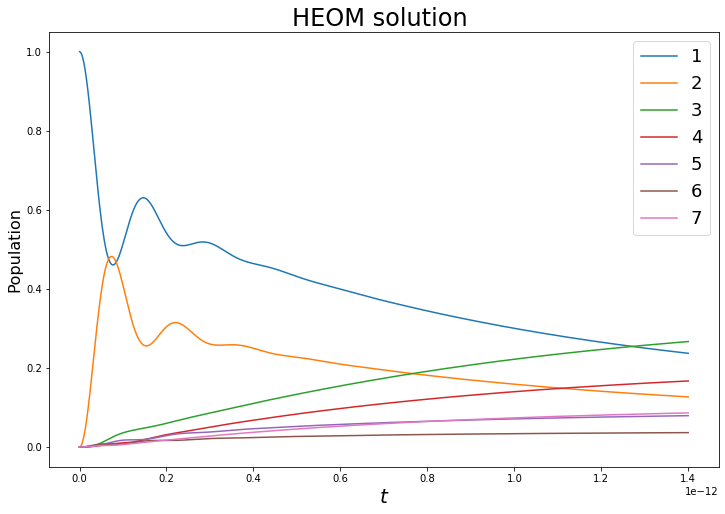

In [200]:
fig, axes = plt.subplots(1,1, figsize=(12,8))
for m in range(7):
    Q =  basis(7,m)*basis(7,m).dag()
    axes.plot(tlist, expect(outputFMOHEOM.states,Q),label=m+1)
axes.set_xlabel(r'$t$', fontsize=20)
axes.set_ylabel(r"Population", fontsize=16);


axes.set_title('HEOM solution ',fontsize=24)
axes.legend(loc=0, fontsize=18)


fig.savefig("fmoheom.png")





A | B | C
- | - | - 
<img src="fmoheom.png" alt="Drawing" style="width: 550px;"/> | <img src="fmosec2.png" alt="Drawing" style="width: 550px;"/> |<img src="fmononsec2.png" alt="Drawing" style="width: 550px;"/>

A | B 
- | -  
<img src="fmoheom.png" alt="Drawing" style="width: 550px;"/> | <img src="fmoBR.png" alt="Drawing" style="width: 550px;"/>

How can we capture which model predicts a better long-time efficiency of energy transport?

Let's return back to our two-level example (these results are from J. Chem. Phys. (2016), Illes-Smith, Dijkstra, Lambert and Nazir).

$$H_S = \frac{\epsilon}{2} \sigma_z + \frac{\Delta}{2}\sigma_x$$  

where the eigenstates of $\sigma_z$ represent the position of the excitation on the two chromophores, $\sigma_z = |X_1, 0_2 \rangle \langle X_1,0_2| -|0_1,X_2\rangle \langle 0_1,X_2|$

<center>
<img src="simple3.png"/>    
</center>


Efficiency relies on how quickly the excitation is moved from one chromophore to another (ultimately so that it can be moved to a reaction center).

We can evaluate the dynamics of different models, and fit the long-time behavior to a rate:

$$\frac{dP_1(t)}{dt} = -k_{1\rightarrow2} P_1 + k_{2\rightarrow 1}P_2$$
$$\frac{dP_2(t)}{dt} = k_{1\rightarrow2} P_1 -k_{2\rightarrow 1}P_2$$





A | B
- | - 
<img src="rates1.png" alt="Drawing" style="width: 550px;"/>| <img src="rates2.png" alt="Drawing" style="width: 450px;"/>

We can also evaluate this for spectral densities with broad background and resonant structures:

<center>
    <img src="rates4.png" alt="Drawing" style="width: 900px;"/> 
</center>



# Conclusions

The study of open quantum systems lets us model how a system interacts with it environment in various limits:

- Weak coupling, no bath memory (Markov), and weak damping gives us the Lindblad Born-Markov-Secular master equation
$$\tau_E \ll \tau_S \ll \tau_R$$
- Exact methods (HEOM, reaction coordinate, pseudo-modes (Lambert et al, Nat. Comm. 2019) give insight into strongly correlated system-bath problems when this approximation no longer holds, and everything occurs on comparable time-scales
$$\tau_E \approx \tau_S \approx \tau_R$$






### How does this help us study light-harvesting?

- Comparing exact models, approximate models, and experimental data gives us insight more than each one alone.

- E.g., in this example we saw that while the noise suppresses coherent oscillations, non-Markovian (resonant) environments can speed-up the transfer time of electronic energy across the whole complex,  which may be important for improving efficency.

**All of these tools are useful for studying in noise in any type of quantum system;  quantum computers, quantum optics, condensed matter systems, etc, (cats?)**


nwlambert@gmail.com

# Generalizing the spectral density

The Drude-Lorentz spectral density is convenient because we can <span style="color:red">analytically expand it as exponentials </span>.

In other cases, we can <span style="color:red">numerically calculate</span> the correlation functions, and then <span style="color:red">numerically fit</span> them to a sum of exponentials.

As a simple example, we can bench-mark against the analytically solvable "pure dephasing model", i.e., we set the coupling operator equal to the system Hamiltonian 

(see A. fruchtman, N. Lambert, E. Gauger, Scientific Reports 2016 for more interesting examples)

<img src="ohmic.png" />

<img src="superohmic.png" />